### MOINDRES CARRES ORDINAIRES

*Source: cette série d'exercices s'inpire très largement des tutoriels de Simon Ejdemyr: https://sejdemyr.github.io/r-tutorials/statistics/*

On commence par charger les mêmes données que dans le TD3, avec les mêmes codes strictement (à un petit détail près, cf. note en bas de code):

In [2]:
#ouverture des données:
library(foreign) #pour ouvrir les données dta de version 14 ou inférieure
anes <- read.dta("TD3_anescum_small_v12.dta")

#on garde seulement quelques variables et on les renomme pour plus de clarté:
library(plyr)
library(dplyr)
anes <- anes %>% 
        dplyr::select(year = VCF0004,
               age = VCF0101,
               gender = VCF0104,
               race = VCF0106,
               edu = VCF0140,
               south = VCF0113,
               income = VCF0114,
               partyid = VCF0301,
               interest = VCF0310,
               govtrust = VCF0604,
               abortion = VCF0838,
               demtherm = VCF0218)
head(anes)

#note: ici, "select" est précédé de "dplyr::". pourquoi ? car nous chargeons aussi le package "arm" qui a aussi sa propre fonction "select" et qui va venir dominer la fonction "select" du package "dplyr". 
#il faut donc préciser de quel package on nécessite la fonction "select"


Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



year,age,gender,race,edu,south,income,partyid,interest,govtrust,abortion,demtherm
1948,NA,1. Male,1,NA,NA,3. 34 to 67 percentile,NA,NA,NA,NA,NA
1948,NA,2. Female,1,NA,NA,5. 96 to 100 percentile,NA,NA,NA,NA,NA
1948,NA,2. Female,1,NA,NA,4. 68 to 95 percentile,NA,NA,NA,NA,NA
1948,NA,2. Female,1,NA,NA,5. 96 to 100 percentile,NA,NA,NA,NA,NA
1948,NA,1. Male,1,NA,NA,4. 68 to 95 percentile,NA,NA,NA,NA,NA
1948,NA,2. Female,1,NA,NA,5. 96 to 100 percentile,NA,NA,NA,NA,NA


En plus de **foreign**, **plyr**, **dplyr**, on va avoir besoin de **ggplot2** :

In [3]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Rappel : le codebook est disponible : TD3_codebook_anescum_small_v12.txt.

# 1. Modèle de régression simple
Nous allons maintenant estimer un modèle simple par MCO et nous allons en donner une représentation graphique (de plus en plus courant). Un modèle simple est un modèle qui met en relation une variable dépendante y avec une explicative x.

### 1.1 Estimation
Nous souhaitons savoir si les préférences pour les démocrates varient selon le genre. 
Commençons par regarder les variables:

In [4]:
#on recode gender
levels(anes$gender)
levels(anes$gender) <- c(NA, "Homme", "Femme")
#on inspecte dermtherm et gender
summary(anes$demtherm)
summary(anes$gender)

[1] "0. NA; no Pre IW" "1. Male"          "2. Female"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   50.00   60.00   62.12   85.00   99.00   23355 

Homme Femme  NA's 
22017 27640   103

Nous régressons ensuite *gender* sur *demtherm* (qui varie de 0 à 100), grâce à **lm()** (lm(y~x)).

In [5]:
#on régresse grâce à lm()
lm1 <- lm(demtherm ~ gender, data = anes)
summary(lm1)


Call:
lm(formula = demtherm ~ gender, data = anes)

Residuals:
    Min      1Q  Median      3Q     Max 
-64.637 -14.637   1.011  20.363  40.011 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   58.989      0.219  269.33   <2e-16 ***
genderFemme    5.649      0.294   19.21   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 23.74 on 26403 degrees of freedom
  (23355 observations deleted due to missingness)
Multiple R-squared:  0.01379,	Adjusted R-squared:  0.01375 
F-statistic: 369.2 on 1 and 26403 DF,  p-value: < 2.2e-16


### 1.2 Représentation graphique
A partir de cette estimation on peut faire deux types de représentations graphiques: 

- l'effet moyen d'être une femme (relativement à l'homme)
- l'opinion moyenne d'un homme et l'opinion moyenne d'une femme (la différence étant l'effet moyen d'être d'un genre plutôt que d'un autre)

L'option 1 revient à représenter le coefficient de *gender* estimé par MCO. 

L'option 2 revient à représenter la valeur prédite moyenne de l'opinion des hommes d'un côté et des femmes de l'autre.

### 1.2.1  Option 1 : représenter le coefficient

Grâce à summary.lm, on peut isoler les coefficients, les erreurs-types, et calculer les intervalles de condiance au seuil de 5% : 

In [13]:
summary(lm1)$coefficients[,1]

(Intercept) genderFemme 
  58.989018    5.648475

In [22]:
est1<-summary(lm1)$coefficients[2,1]
est1

[1] 5.648475

In [20]:
summary(lm1)$coefficients[,2]
sd_est1<-summary(lm1)$coefficients[2,2]
sd_est1

(Intercept) genderFemme 
  0.2190232   0.2939552

[1] 0.2939552

In [23]:
c_inf <- est1-(1.96*sd_est1)
c_inf

[1] 5.072323

In [24]:
c_sup <- est1+(1.96*sd_est1)
c_sup

[1] 6.224627

On peut donc les utiiser pour créer un data frame avec toutes les informations nécessaires à contruire un graphique de notre résultat principal. Nous avons besoin: 
- du coefficient de 'gender'
- de l'intervalle de confiance autour de ce coefficient
- que nous devons intégrer un à dataframe

In [25]:
#création du data frame:
est1 <- data.frame(est=est1,
                    c_inf=c_inf,
                    c_sup=c_sup,
                    model="Modèle simple")
#le dataframe crée:
est1
est1[1]

est,c_inf,c_sup,model
5.648475,5.072323,6.224627,Modèle simple


est
5.648475


On peut ensuite réaliser le graphique avec **ggplot()**.

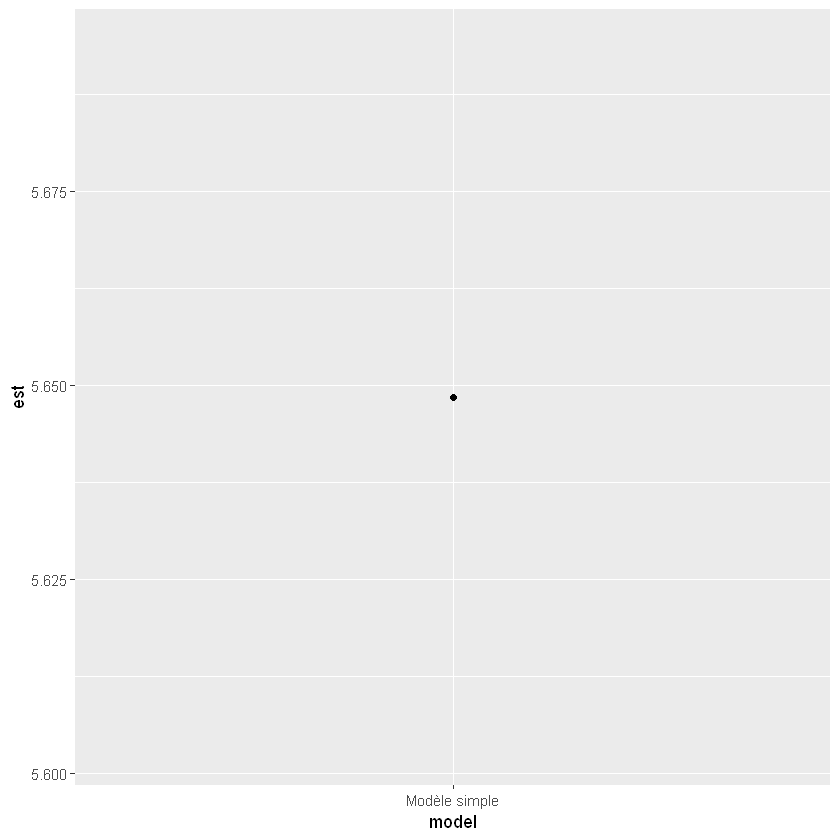

In [26]:
ggplot(est1, aes(x=model,y=est)) +
    geom_point()

On ajoute l'intervalle de confiance :

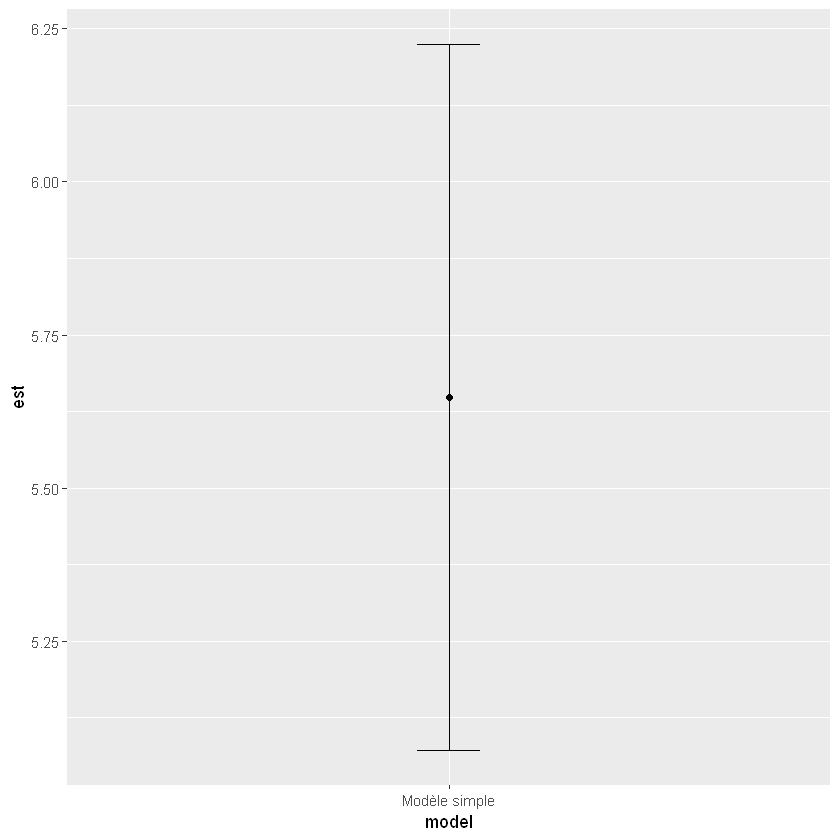

In [27]:
ggplot(est1, aes(x=model,y=est)) +
    geom_point() + 
    geom_errorbar(aes(ymin = c_inf, ymax = c_sup), width = 0.1) 
    

On change l'échelle de y pour améliorer la lecture du graphique:

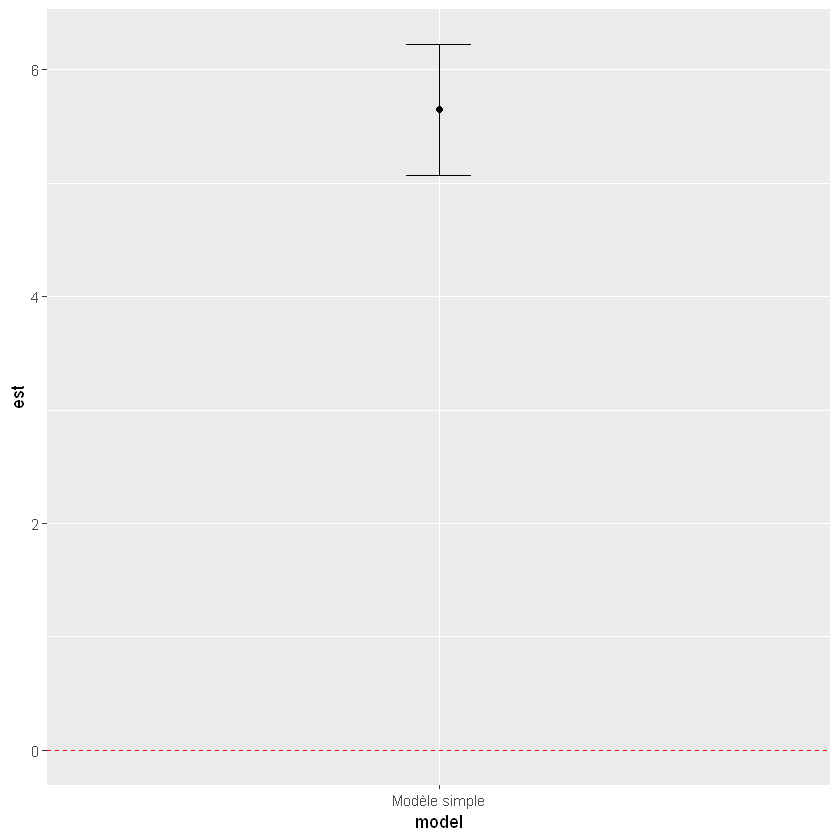

In [28]:
ggplot(est1, aes(x=model,y=est)) +
    geom_point() + 
    geom_errorbar(aes(ymin = c_inf, ymax = c_sup), width = 0.1) +
    geom_hline(yintercept = 0, lty = 2, color = "red") 

On ajoute des labels aux axes :

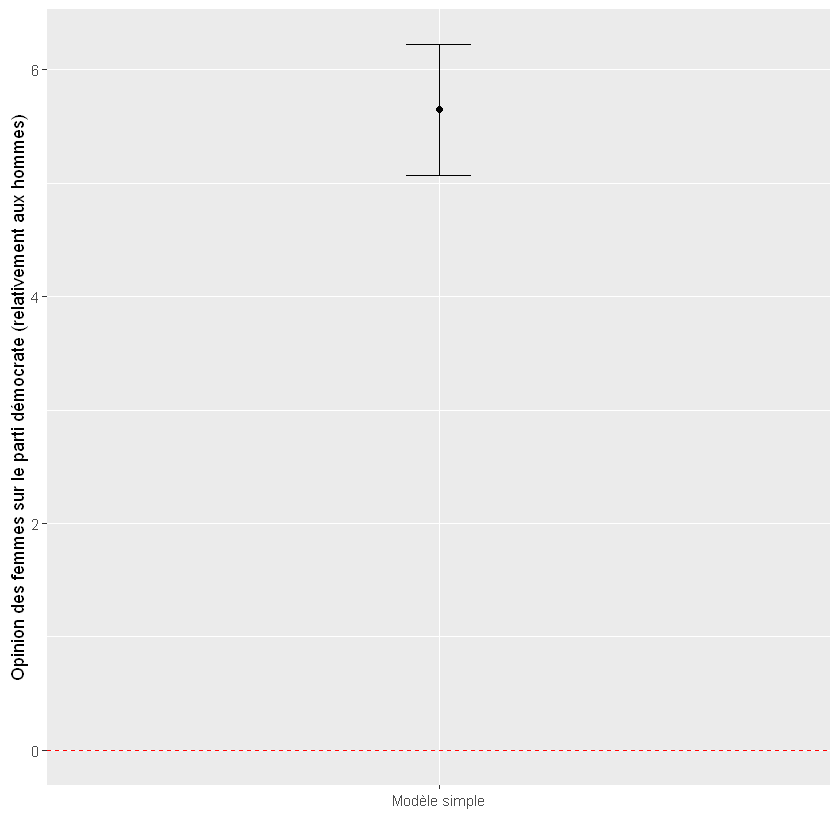

In [29]:
ggplot(est1, aes(x=model,y=est)) +
    geom_point() + 
    geom_errorbar(aes(ymin = c_inf, ymax = c_sup), width = 0.1) +
    geom_hline(yintercept = 0, lty = 2, color = "red") +
    xlab("") +
    ylab("Opinion des femmes sur le parti démocrate (relativement aux hommes)")

### 1.2.2 Option 2 : représenter la moyenne conditionnelle de la variable dépendante y selon les différentes catégories de x

On extrait de l'estimation "lm1" les valeurs prédites du score pro démocrate du thermomètre, ainsi que l'intervalle de confiance autour de ces valeurs prédites. 

In [30]:
predict_for <- data.frame(gender = c("Homme", "Femme"))

pred1 <- predict(lm1,
                 newdata = predict_for,
                 se.fit = T,
                 interval = "confidence")

Regardons ce que ça donne :

In [31]:
predict_for
pred1

gender
Homme
Femme


fit,lwr,upr
58.98902,58.55972,59.41831
64.63749,64.25321,65.02178


Ce qui nous intéresse se trouve dans $fit. On crée un nouveau dataframe *pred1* dans leuel on crée la variable *Genre* pour la légende du graphique :

In [17]:
pred1 <- data.frame(cbind(pred1$fit, predict_for))
pred1

fit,lwr,upr,gender
58.98902,58.55972,59.41831,Homme
64.63749,64.25321,65.02178,Femme


On peut maintenant représenter les coefficients graphiquement par **ggplot** et **geom_point()** :

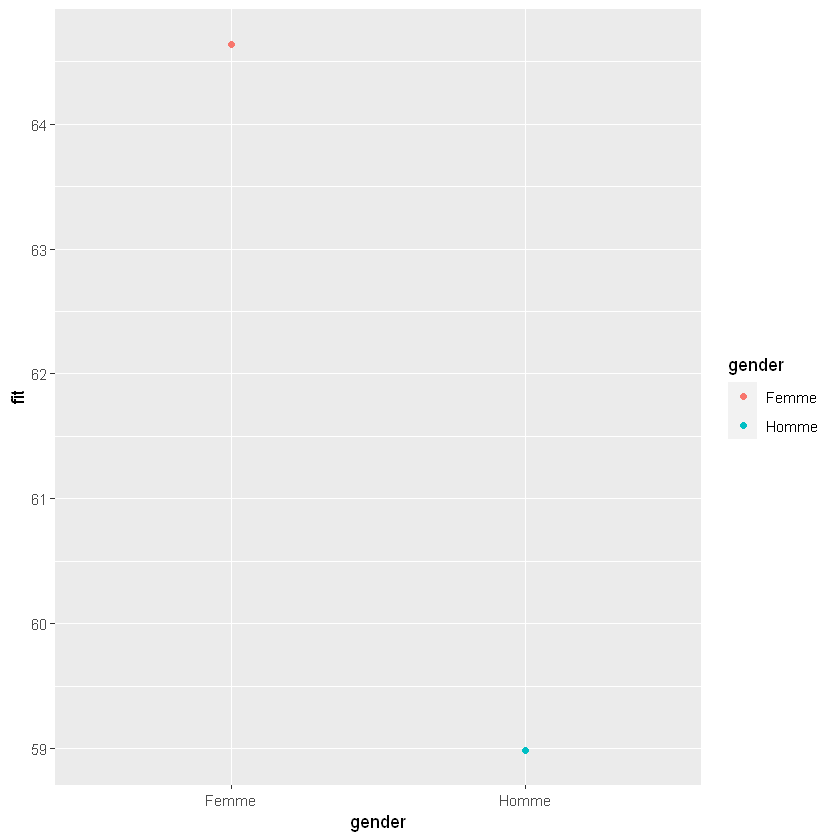

In [18]:
ggplot(pred1, aes(x = gender, y = fit, color = gender)) +
    geom_point() 

On ajoute les intervalles de confiance (**geom_errorbar()**) et des labels aux axes (**xlab()** et **ylab()**) : 

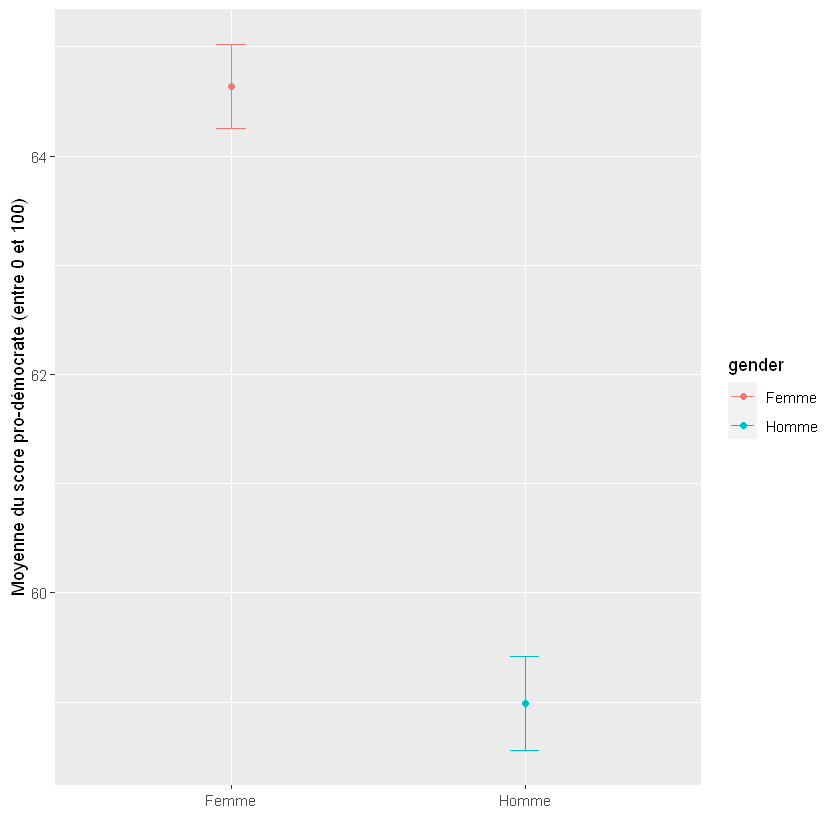

In [19]:

ggplot(pred1, aes(x = gender, y = fit, color = gender)) +
    geom_point() +
    geom_errorbar(aes(ymin = lwr, ymax = upr), width = 0.1) +
    xlab("") +
    ylab("Moyenne du score pro-démocrate (entre 0 et 100)")

Discussion: Que conclure ? Quelle est la relation entre le premier graphique (option 1) et le second graphique (option 2) ?

# 2. Modèle de régression multiple
On peut également estimer un modèle à plusieurs variables explicatives. On ajoute à notre modèle simple deux variables: *income* et *age*.

### 2.1 Estimation

Avant toute chose on vérifie quelle est la nature des données, et on les inspecte pour vérifier que les variables manquantes sont bien encodées NA (not available).

In [20]:
class(anes$age)
class(anes$income)

[1] "numeric"

[1] "factor"

In [21]:
sort(unique(anes$age)) #get a vector of sorted unique values
levels(anes$income)

[1]  0 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
[26] 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
[51] 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
[76] 91 92 93 94 95 96 97 98 99

[1] "0. DK; NA; refused to answer; no Pre IW"
[2] "1. 0 to 16 percentile"                  
[3] "2. 17 to 33 percentile"                 
[4] "3. 34 to 67 percentile"                 
[5] "4. 68 to 95 percentile"                 
[6] "5. 96 to 100 percentile"

On voit que certaines personnes ont un âge de 0. On voit aussi que la catégorie 1 de *income* correspond en fait à de l'information manquante.

Nous ne souhaitons pas que la régression tienne compte des observations pour lesquelles la valeur est en fait manquante. Pour cela, on effectue les modifications nécessaires concernant les valeurs manquantes : 

In [22]:
#correction de age
anes$age[anes$age==0]<-NA
sort(unique(anes$age)) 

#correction des quintiles
levels(anes$income)[1]<-NA
levels(anes$income)

[1] 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
[26] 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
[51] 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
[76] 92 93 94 95 96 97 98 99

[1] "1. 0 to 16 percentile"   "2. 17 to 33 percentile" 
[3] "3. 34 to 67 percentile"  "4. 68 to 95 percentile" 
[5] "5. 96 to 100 percentile"

On peut alors régresser :

In [32]:
lm2 <- lm(demtherm~gender+income+age, data=anes)

Pour visualiser : 

In [33]:
summary(lm2) #avec les étoiles


Call:
lm(formula = demtherm ~ gender + income + age, data = anes)

Residuals:
    Min      1Q  Median      3Q     Max 
-75.594 -14.418   0.599  18.162  51.511 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    57.606256   0.627250  91.839  < 2e-16 ***
genderFemme                     4.132062   0.290848  14.207  < 2e-16 ***
income1. 0 to 16 percentile     6.043360   0.579755  10.424  < 2e-16 ***
income2. 17 to 33 percentile    2.058786   0.576438   3.572 0.000355 ***
income3. 34 to 67 percentile   -2.420128   0.522660  -4.630 3.67e-06 ***
income4. 68 to 95 percentile   -6.369211   0.541353 -11.765  < 2e-16 ***
income5. 96 to 100 percentile -11.797675   0.787046 -14.990  < 2e-16 ***
age                             0.084007   0.008089  10.385  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 23.2 on 26397 degrees of freedom
  (23355 observations deleted due to miss

Discussion : interpréter les coefficients estimés par le modèle lm2.

### 2.2 Représentation graphique

**Exercice 1** : 

Réaliser le graphique type 'Option 1' qui montre l'effet du genre sur le thermomètre démocrate, avec le nouveau modèle lm2.

In [34]:
#voir les objets



Call:
lm(formula = demtherm ~ gender + income + age, data = anes)

Residuals:
    Min      1Q  Median      3Q     Max 
-75.594 -14.418   0.599  18.162  51.511 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    57.606256   0.627250  91.839  < 2e-16 ***
genderFemme                     4.132062   0.290848  14.207  < 2e-16 ***
income1. 0 to 16 percentile     6.043360   0.579755  10.424  < 2e-16 ***
income2. 17 to 33 percentile    2.058786   0.576438   3.572 0.000355 ***
income3. 34 to 67 percentile   -2.420128   0.522660  -4.630 3.67e-06 ***
income4. 68 to 95 percentile   -6.369211   0.541353 -11.765  < 2e-16 ***
income5. 96 to 100 percentile -11.797675   0.787046 -14.990  < 2e-16 ***
age                             0.084007   0.008089  10.385  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 23.2 on 26397 degrees of freedom
  (23355 observations deleted due to miss

In [35]:
#sélection des objets pertinents
est2<-
sd_est2<-
c_inf<-
c_sup<-
est2
c_inf
c_sup

[1] 4.132062

[1] 3.562

[1] 4.702124

In [36]:
#création d'un dataframe
est2 <- 

In [37]:
#voir le dataframe crée:
est2

est,c_inf,c_sup,model
4.132062,3.562,4.702124,Modèle multiple


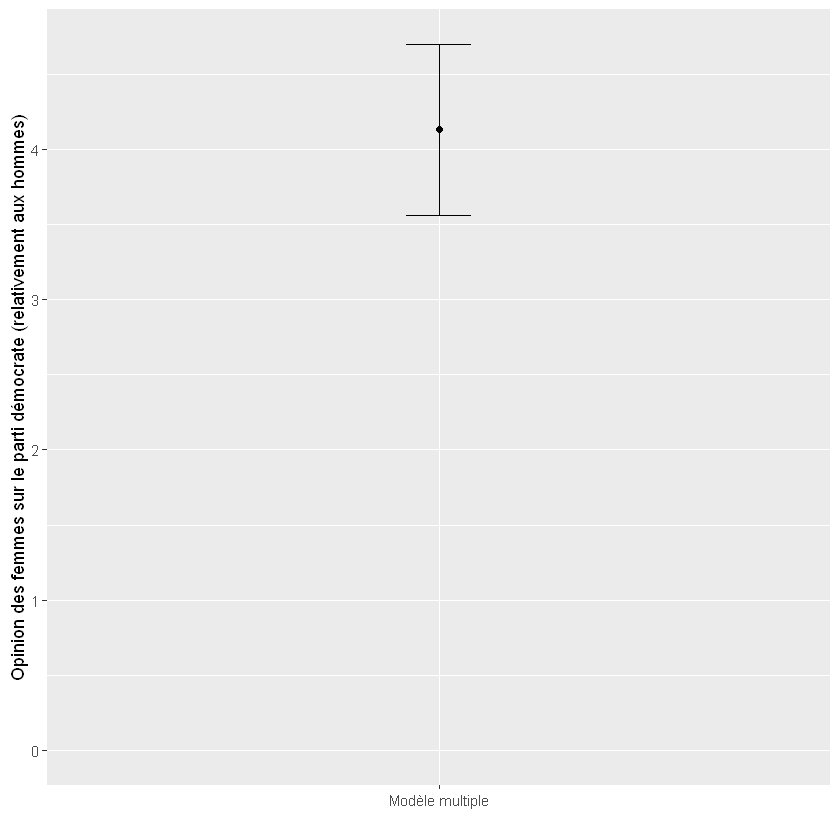

In [38]:
#graphique
ggplot(...

Note: 

- Si l'on a bien nommé les éléments des dataframes est1 et est2 de la même manière, à savoir par exemple ici: est, c_inf, c_sup et model, 
- Alors on pourra facilement représenter les deux estimations sur un même graphique à titre de comparaison, 
- En utilisant **rbind()** pour ajouter les lignes (row) des dataframes *est1* et *est2*
- Ce qui donne un seul dataframe combiné :

In [39]:
est<-rbind(est1,est2)
est

est,c_inf,c_sup,model
5.648475,5.072323,6.224627,Modèle simple
4.132062,3.562000,4.702124,Modèle multiple


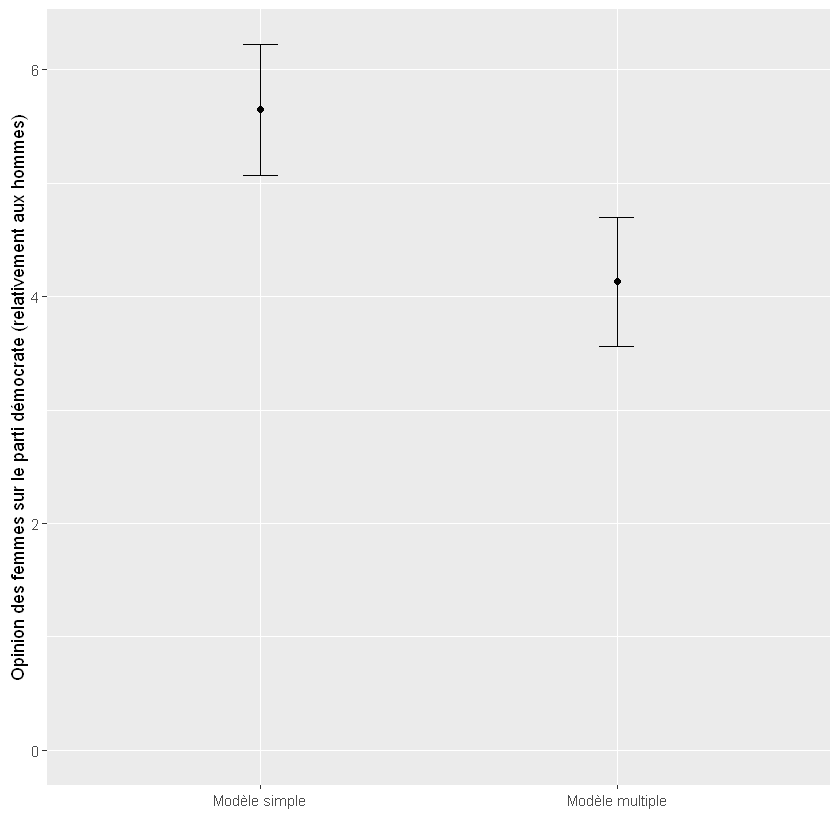

In [40]:
ggplot(est,aes(x=model, y=est)) + 
    geom_point() +
    geom_errorbar(aes(ymin=c_inf,ymax=c_sup), width=0.1) +
    geom_hline(yintercept = 0, color="white") +
    xlab("") +
    ylab("Opinion des femmes sur le parti démocrate (relativement aux hommes)")

### 2.3 Interactions
On peut souhaiter savoir si l'effet du genre sur le score pro-démocrate varie selon l'âge de la personne. 

Pour ce faire, il est nécessaire d'introduire un terme d'interaction dans la régression, entre l'âge et le genre. 

On estime le modèle suivant: 

In [41]:
lm3 <- lm(demtherm~gender+age+income+age:gender, data = anes)

In [42]:
summary(lm3)


Call:
lm(formula = demtherm ~ gender + age + income + age:gender, data = anes)

Residuals:
    Min      1Q  Median      3Q     Max 
-74.578 -14.275   0.676  18.017  52.340 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    56.22771    0.74979  74.991  < 2e-16 ***
genderFemme                     6.58960    0.78823   8.360  < 2e-16 ***
age                             0.11619    0.01255   9.259  < 2e-16 ***
income1. 0 to 16 percentile     6.03765    0.57964  10.416  < 2e-16 ***
income2. 17 to 33 percentile    2.01165    0.57650   3.489 0.000485 ***
income3. 34 to 67 percentile   -2.48087    0.52287  -4.745  2.1e-06 ***
income4. 68 to 95 percentile   -6.44027    0.54166 -11.890  < 2e-16 ***
income5. 96 to 100 percentile -11.89125    0.78739 -15.102  < 2e-16 ***
genderFemme:age                -0.05465    0.01629  -3.354 0.000796 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error

Discussion: interpréter.

On peut également imaginer représenter l'effet différencié du genre selon l'âge de la personne par un graphique : 

In [43]:
#on crée les catégories:
predict_for <- data.frame(expand.grid(gender = c("Homme", "Femme"),
                                 age = 18:85), 
                     income = "3. 34 to 67 percentile") #expand.grid: creates a data frame from all combinations of the supplied vectors or factors
predict_for

gender,age,income
Homme,18,3. 34 to 67 percentile
Femme,18,3. 34 to 67 percentile
Homme,19,3. 34 to 67 percentile
Femme,19,3. 34 to 67 percentile
Homme,20,3. 34 to 67 percentile
Femme,20,3. 34 to 67 percentile
Homme,21,3. 34 to 67 percentile
Femme,21,3. 34 to 67 percentile
Homme,22,3. 34 to 67 percentile
Femme,22,3. 34 to 67 percentile


In [44]:
#on prédit les valeurs du score pro-démocrate correspondant à ces catégories
pred3 <- predict(lm3,
             newdata=predict_for,
             se.fit=T,
             interval="confidence")

In [45]:
#pour voir:
head(predict_for)
head(pred3)

gender,age,income
Homme,18,3. 34 to 67 percentile
Femme,18,3. 34 to 67 percentile
Homme,19,3. 34 to 67 percentile
Femme,19,3. 34 to 67 percentile
Homme,20,3. 34 to 67 percentile
Femme,20,3. 34 to 67 percentile


fit,lwr,upr
55.83832,54.96900,56.70765
61.44417,60.65348,62.23485
55.95452,55.10305,56.80598
61.50571,60.72897,62.28245
56.07071,55.23677,56.90465
61.56725,60.80415,62.33035
56.18690,55.37012,57.00368
61.62879,60.87901,62.37856
56.30310,55.50309,57.10311
61.69033,60.95354,62.42712


In [47]:
#on combine les colonnes de pred3 et predict_for en un seul dataframe pred3:
pred3 <- data.frame(cbind(pred3$fit,predict_for))
head(pred3)

fit,lwr,upr,gender,age,income
55.83832,54.96900,56.70765,Homme,18,3. 34 to 67 percentile
61.44417,60.65348,62.23485,Femme,18,3. 34 to 67 percentile
55.95452,55.10305,56.80598,Homme,19,3. 34 to 67 percentile
61.50571,60.72897,62.28245,Femme,19,3. 34 to 67 percentile
56.07071,55.23677,56.90465,Homme,20,3. 34 to 67 percentile
61.56725,60.80415,62.33035,Femme,20,3. 34 to 67 percentile


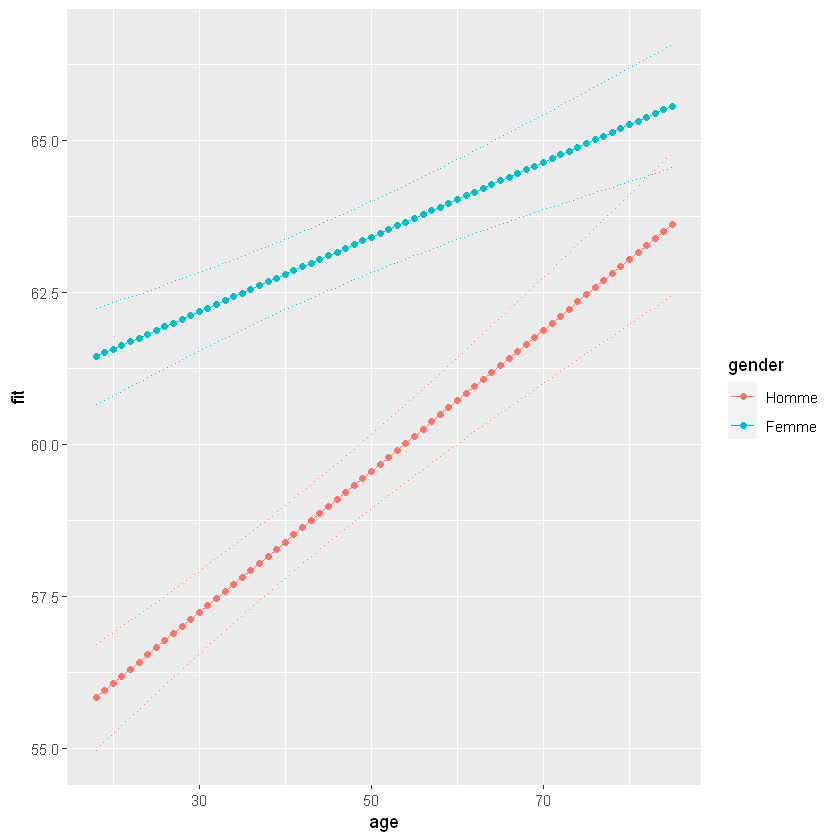

In [48]:
#on utilise ce dataframe pour créer le graphique:
ggplot(pred3, aes(x=age,y=fit,color=gender)) +
    geom_line() + geom_point() +
    geom_line(aes(y=lwr),lty=3) + geom_line(aes(y=upr),lty=3)

Discussion: conclure sur le graphique.

On sauve les données avec **saveRDS()** :

In [49]:
# Save an object to a file
saveRDS(anes, file = "TD4_mydata.rds")

Note: Pour ouvrir un objet dans R : 
**readRDS(file = "TD4_my_data.rds")**

### Exercice 2
On souhaite connaître l'impact de l'ethnie sur le score pro-démocrate. On estime un modèle où le score *demtherm* dépend: du genre *gender*, de l'âge *age*, du niveau d'éducation *edu*, de l'ethnie *race*. Le codebook nous apprend que *race* prend 3 valeurs: 1 si 'white', 2 si 'black', 3 si 'other', 9 si 'missing'.

Commencez par restaurer l'objet *"TD4_mydata.rds"*. Créez un dataframequi contient uniquement les données qui nous intéressent (rappel: TD2: **library(dplyr)**, piping **%>%**, fonction **select()**).

In [2]:
library(plyr)
library(dplyr)
d<-readRDS(file="TD4_mydata.rds")
d<-d%>%dplyr::select(demtherm,age,gender,edu,race)


Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Produisez des statistiques descriptives basiques sur ces variables (summary()).

    demtherm          age          gender     
 Min.   : 0.00   Min.   :17.00   Homme:22017  
 1st Qu.:50.00   1st Qu.:32.00   Femme:27640  
 Median :60.00   Median :43.00   NA's :  103  
 Mean   :62.12   Mean   :45.84                
 3rd Qu.:85.00   3rd Qu.:59.00                
 Max.   :99.00   Max.   :99.00                
 NA's   :23355   NA's   :2159                 
                                                     edu             race      
 3. 12 grades, diploma or equivalency                  :12175   Min.   :0.000  
 5. Some college, no degree; junior/community college  : 9803   1st Qu.:1.000  
 6. BA level degrees; advanced degrees incl. LLB       : 8552   Median :1.000  
 1. 8 grades or less ('grade school')                  : 7639   Mean   :1.305  
 2. 9-12 grades ('high school'), no diploma/equivalency: 6901   3rd Qu.:1.000  
 (Other)                                               : 4028   Max.   :9.000  
 NA's                                                  :  662   

Créez deux variables : 
- *white* qui vaudra 1 si l'individu se définit comme blanc américain, 0 s'il se définit comme noir américain ou autre
- *edu3* qui regroupera 1. et 2. en 'Pre-bac', 3. et 4. en 'Bac', 5 et 6. en 'Université', 8. et 9 en NA

In [5]:
class(d$race)
table(d$race)
class(d$edu)
table(d$edu)

[1] "integer"


    0     1     2     3     9 
   11 40286  5753  3372   338 

[1] "factor"


                  1. 8 grades or less ('grade school') 
                                                  7639 
2. 9-12 grades ('high school'), no diploma/equivalency 
                                                  6901 
                  3. 12 grades, diploma or equivalency 
                                                 12175 
4. 12 grades, diploma or equivalency plus non-academic 
                                                  3548 
  5. Some college, no degree; junior/community college 
                                                  9803 
       6. BA level degrees; advanced degrees incl. LLB 
                                                  8552 
                                                 8. DK 
                                                    26 
  9. NA; RF; no Pre IW; short-form 'new' Cross Section 
                                                   454 

Rappel du codebook : race prend les valeurs : 

1=White

2=Black

3=Native American

4=Asian

7=0ther

9/0 = NA: Inap. question not used

In [41]:
#white: création de la variable




    0     1  <NA> 
 9125 40286   349 

1. 8 grades or less ('grade school') 
                                                  7639 
2. 9-12 grades ('high school'), no diploma/equivalency 
                                                  6901 
                  3. 12 grades, diploma or equivalency 
                                                 12175 
4. 12 grades, diploma or equivalency plus non-academic 
                                                  3548 
  5. Some college, no degree; junior/community college 
                                                  9803 
       6. BA level degrees; advanced degrees incl. LLB 
                                                  8552 
                                                 8. DK 
                                                    26 
  9. NA; RF; no Pre IW; short-form 'new' Cross Section 
                                                   454 
                                                  NA's 
                                                   662

[1] "1. 8 grades or less ('grade school')"                  
[2] "2. 9-12 grades ('high school'), no diploma/equivalency"
[3] "3. 12 grades, diploma or equivalency"                  
[4] "4. 12 grades, diploma or equivalency plus non-academic"
[5] "5. Some college, no degree; junior/community college"  
[6] "6. BA level degrees; advanced degrees incl. LLB"       
[7] "8. DK"                                                 
[8] "9. NA; RF; no Pre IW; short-form 'new' Cross Section"

[1] "Pre-bac"    "Bac"        "Université"

Pre-bac        Bac Université       NA's 
     14540      15723      18355       1142

In [ ]:
#attention aux valeurs manquantes qui doivent être recodées en 'NA'


In [ ]:
#on définit white comme facteur


In [ ]:
#on définit son niveau 0 comme "Non-White" et son niveau 1 comme "White"


In [ ]:
#on crée edu3 comme une duplication de edu


In [ ]:
#redéfinition des niveaux de edu


Effectuer la régression de *demtherm* sur *age*, *genre*, et les deux variables nouvellement crées: *edu3* et *white*. Afficher les résultats et commenter.

In [42]:
lm1<-


Call:
lm(formula = demtherm ~ gender + age + edu3 + white, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-83.793 -13.504   0.851  16.140  48.816 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     72.510779   0.585159  123.92   <2e-16 ***
genderFemme      4.718786   0.281596   16.76   <2e-16 ***
age              0.096525   0.008243   11.71   <2e-16 ***
edu3Bac         -6.513596   0.409277  -15.91   <2e-16 ***
edu3Université -11.157508   0.394290  -28.30   <2e-16 ***
whiteWhite     -13.196171   0.330763  -39.90   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.44 on 25886 degrees of freedom
  (23868 observations deleted due to missingness)
Multiple R-squared:  0.1182,	Adjusted R-squared:  0.118 
F-statistic: 693.9 on 5 and 25886 DF,  p-value: < 2.2e-16


Représenter graphiquement le score moyen des blancs américains et non-blancs (on prendra les hommes de niveau bac et d'âge de 40).

gender,age,edu3,white
Homme,40,Bac,Non-White
Homme,40,Bac,White


fit,lwr,upr
69.85817,69.09990,70.61644
56.66199,56.06842,57.25557


fit,lwr,upr,gender,age,edu3,white
69.85817,69.09990,70.61644,Homme,40,Bac,Non-White
56.66199,56.06842,57.25557,Homme,40,Bac,White


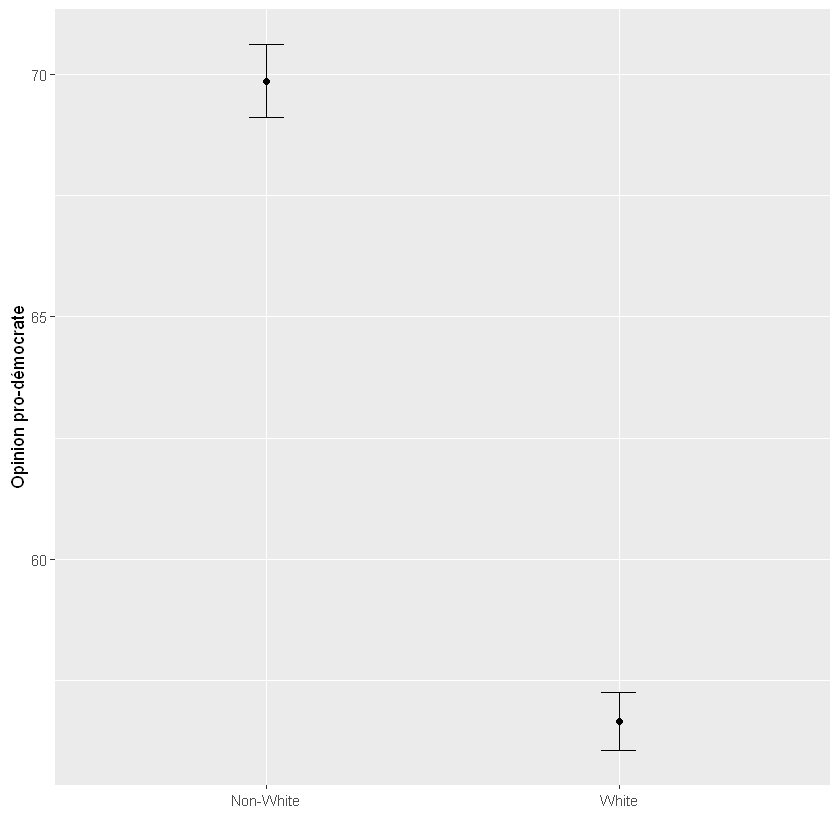

In [43]:
#catégorie pour laquelle on va prédire :
predict_for <- 
predict_for

#on prédit :
pred1<-
pred1

#on associe:
pred1 <- 
pred1

#graphique :
library(ggplot2)
ggplot()

Refaire l'estimation en interagissant l'ethnie avec l'éducation :

In [44]:
lm2 <- 


Call:
lm(formula = demtherm ~ gender + age + edu3 + white + white:edu3, 
    data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-80.812 -13.507   0.608  16.680  49.147 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               69.726169   0.685833 101.666  < 2e-16 ***
genderFemme                4.714351   0.281306  16.759  < 2e-16 ***
age                        0.093703   0.008242  11.369  < 2e-16 ***
edu3Bac                   -2.991166   0.728229  -4.107 4.01e-05 ***
edu3Université            -6.703670   0.703618  -9.527  < 2e-16 ***
whiteWhite                -8.655067   0.667913 -12.958  < 2e-16 ***
edu3Bac:whiteWhite        -5.343285   0.869144  -6.148 7.97e-10 ***
edu3Université:whiteWhite -6.482495   0.835703  -7.757 9.02e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.41 on 25884 degrees of freedom
  (23868 observations deleted due to missingness)
Multiple R-squ

OPTIONNEL : Représenter graphiquement les scores moyens des hommes de 40 ans selon leur niveau d'étude, pour les non-whites et whites (les scores moyens avec leu rintervalle de confiance en ordonnée, les niveaux d'éducation en absisse, et les origines ethniques en légende).

gender,age,white,edu3
Homme,40,Non-White,Pre-bac
Homme,40,White,Pre-bac
Homme,40,Non-White,Bac
Homme,40,White,Bac
Homme,40,Non-White,Université
Homme,40,White,Université


fit,lwr,upr
73.47429,72.36868,74.57989
64.81922,63.94532,65.69312
70.48312,69.46993,71.49631
56.48477,55.85262,57.11692
66.77062,65.83209,67.70915
51.63305,51.10366,52.16245


fit,lwr,upr,gender,age,white,edu3
73.47429,72.36868,74.57989,Homme,40,Non-White,Pre-bac
64.81922,63.94532,65.69312,Homme,40,White,Pre-bac
70.48312,69.46993,71.49631,Homme,40,Non-White,Bac
56.48477,55.85262,57.11692,Homme,40,White,Bac
66.77062,65.83209,67.70915,Homme,40,Non-White,Université
51.63305,51.10366,52.16245,Homme,40,White,Université


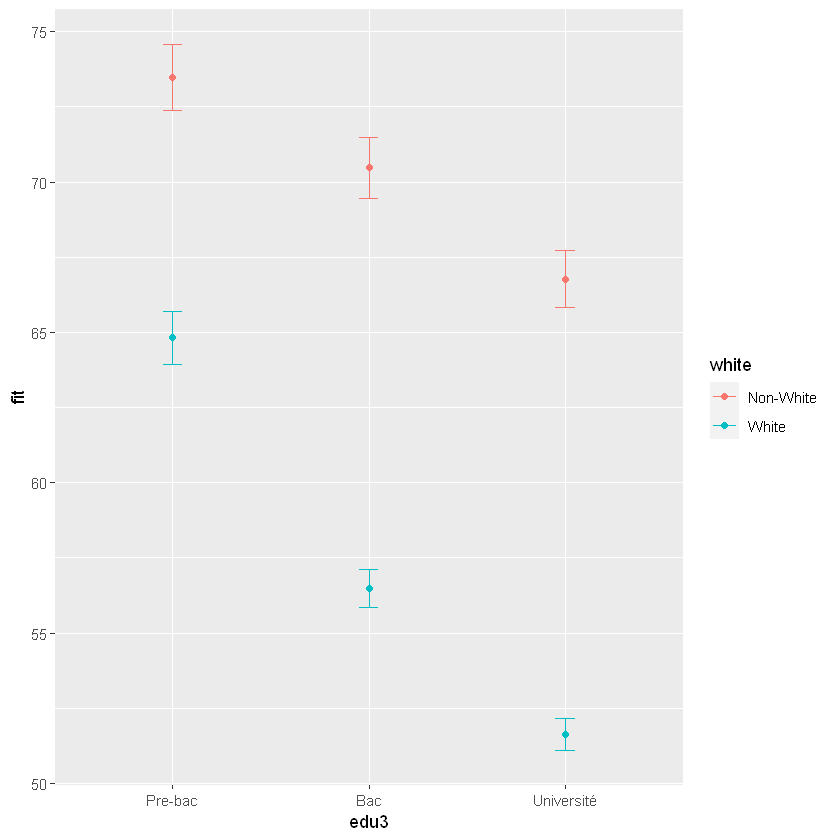

In [45]:
#catégories pour lesquelles on prédit:
predict_for<-
predict_for

#valeurs prédites:
pred2<-
pred2

#combinaison des deux objets en 1 dataframe
pred2<-
pred2

#on utilise ce dataframe pour créer le graphique: